# Vizualização dos dados

In [65]:
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.express as px
from matplotlib import pyplot as plt

#### Profile Report

In [58]:
baseTreino = pd.read_csv('desafio_manutencao_preditiva_treino.csv')

In [41]:
baseTreino

udi product_id type  air_temperature_k  process_temperature_k  \
0         1     M14860    M              298.1                  308.6   
1         2     L47181    L              298.2                  308.7   
2         5     L47184    L              298.2                  308.7   
3         6     M14865    M              298.1                  308.6   
4         7     L47186    L              298.1                  308.6   
...     ...        ...  ...                ...                    ...   
6662   9995     L57174    L              298.8                  308.3   
6663   9996     M24855    M              298.8                  308.4   
6664   9997     H39410    H              298.9                  308.4   
6665   9999     H39412    H              299.0                  308.7   
6666  10000     M24859    M              299.0                  308.7   

      rotational_speed_rpm  torque_nm  tool_wear_min failure_type  
0                     1551       42.8              0   No Failure  
1                     1408       46.3              3   No Failure  
2                     1408       40.0              9   No Failure  
3                     1425       41.9             11   No Failure  
4                     1558       42.4             14   No Failure  
...                    ...        ...            ...          ...  
6662                  1634       27.9             12   No Failure  
6663                  1604       29.5             14   No Failure  
6664                  1632       31.8             17   No Failure  
6665                  1408       48.5             25   No Failure  
6666                  1500       40.2             30   No Failure  

[6667 rows x 9 columns]

In [42]:
baseTreino.dtypes

udi                        int64
product_id                object
type                      object
air_temperature_k        float64
process_temperature_k    float64
rotational_speed_rpm       int64
torque_nm                float64
tool_wear_min              int64
failure_type              object
dtype: object

In [43]:
profile_baseTreino = ProfileReport(baseTreino, explorative=True)

In [44]:
profile_baseTreino

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
profile_baseTreino.to_file("report_baseTreino.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

* As colunas 'id' e 'udi' tem valores unicos para cada registro, portanto não serão usadas no treinamento
* A coluna 'type' possui três tipos de registros categóricos que devem ser tratados para execução do modelo
* RPM e torque tem correlação negativa, pode ser interessante usar apenas uma delas
* Tair e T process tem correlação positiva, pode ser interessante usar apenas uma delas
* Normalizar pois temos valores de grandezas muito diferentes
* A variável a ser prevista (Failure type) é uma variável categórica
* 96,5% dos registros apresentam "No failure" na coluna 'failure_type', esse desbalanço de registros pode ser um problema no treinamento, para lidar com esse problema irei fazer testes com Oversampling, Undersampling e alterando o parametro class_weight nos modelos

             
             

### Gráficos Scatter

In [59]:
basescatter = baseTreino.drop(baseTreino[baseTreino['failure_type'] == 'No Failure'].index)

#### Temperatura

* Possível observar que o tipo de falha 'Heat Dissipation Failure' apresenta uma faixa bem restrita de valores tanto para 'process_temperature_k' quanto para 'air_temperature_k'

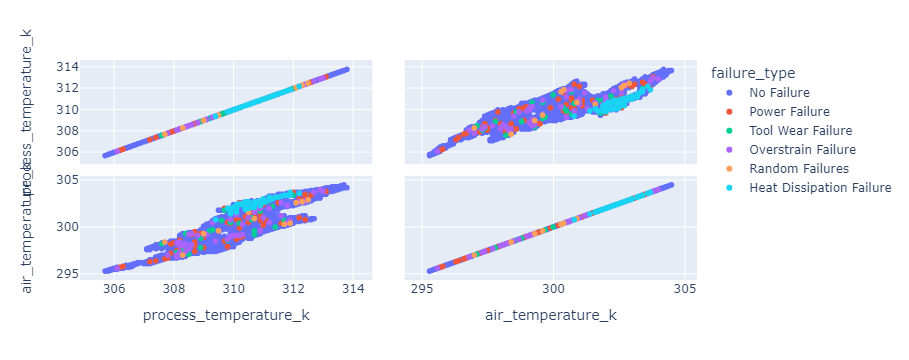

In [68]:
grafico = px.scatter_matrix(baseTreino, dimensions=['process_temperature_k','air_temperature_k'], color = 'failure_type')
plt.savefig("grafico.png")
grafico

In [61]:
grafico.to_file("scatter_temperature.png")

AttributeError: 'Figure' object has no attribute 'to_file'

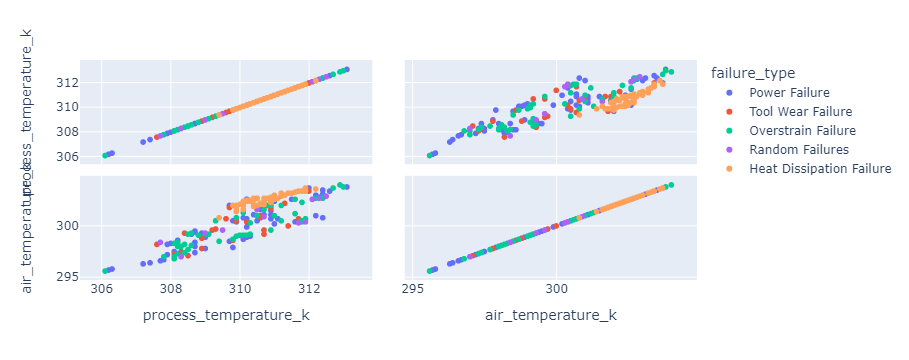

In [48]:
grafico = px.scatter_matrix(basescatter, dimensions=['process_temperature_k','air_temperature_k'], color = 'failure_type')
grafico

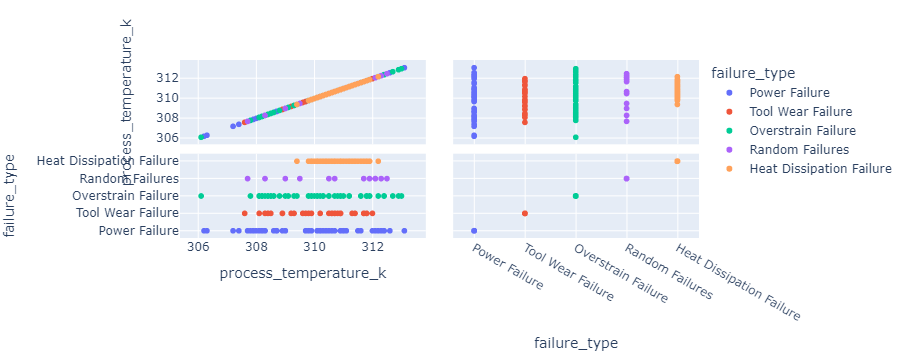

In [49]:
grafico = px.scatter_matrix(basescatter, dimensions=['process_temperature_k', 'failure_type'], color = 'failure_type')
grafico

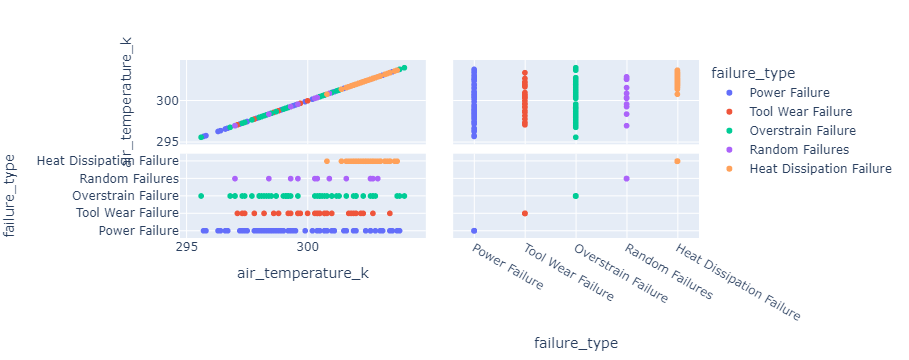

In [50]:
grafico = px.scatter_matrix(basescatter, dimensions=['air_temperature_k', 'failure_type'], color = 'failure_type')
grafico

#### Torque and rotational speed

* As falhas do tipo 'Overstrain Failure', 'Heat Dissipation Failure' e 'Random Failure' ocorrem em faixas restritas de valores de torque
* O tipo de falha 'Power Failure' se concentra nas faixas mais baixas e mais altas de torque

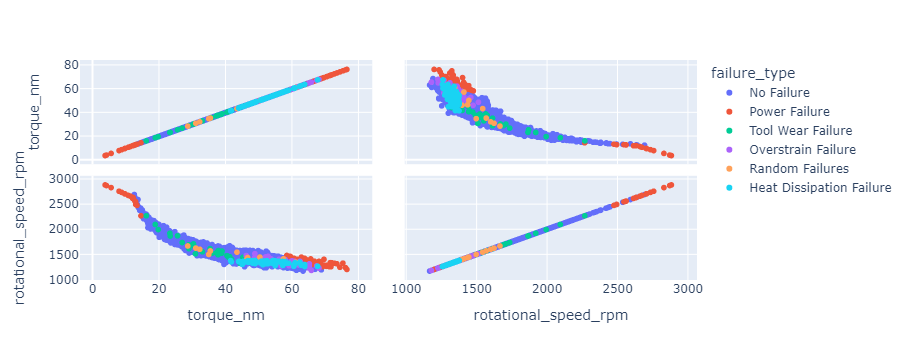

In [51]:
grafico = px.scatter_matrix(baseTreino, dimensions=['torque_nm','rotational_speed_rpm'], color = 'failure_type')
grafico

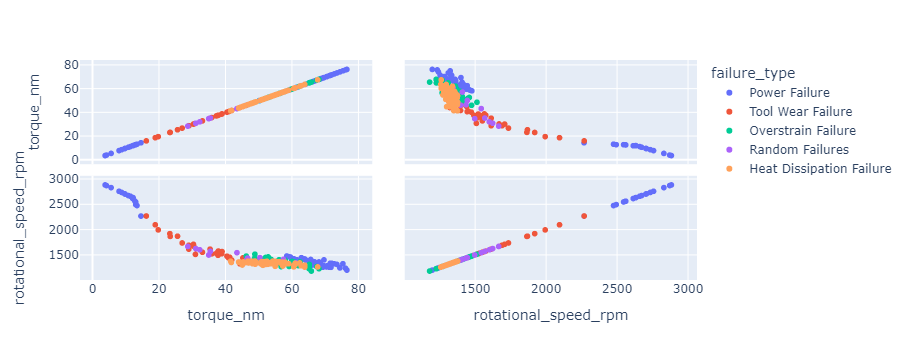

In [52]:
grafico = px.scatter_matrix(basescatter, dimensions=['torque_nm','rotational_speed_rpm'], color = 'failure_type')
grafico

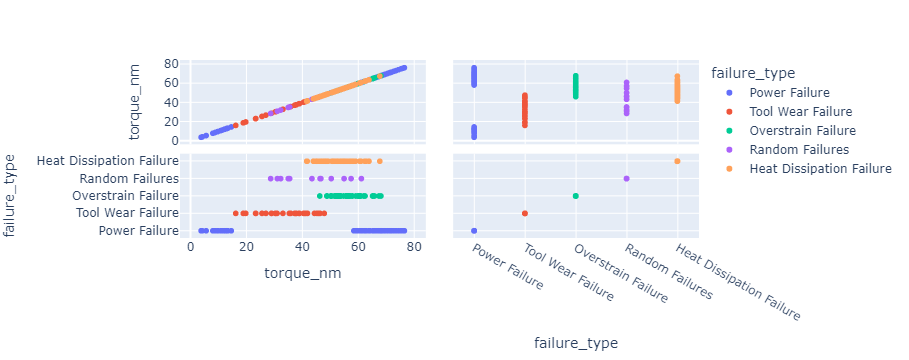

In [53]:
grafico = px.scatter_matrix(basescatter, dimensions=['torque_nm', 'failure_type'], color = 'failure_type')
grafico

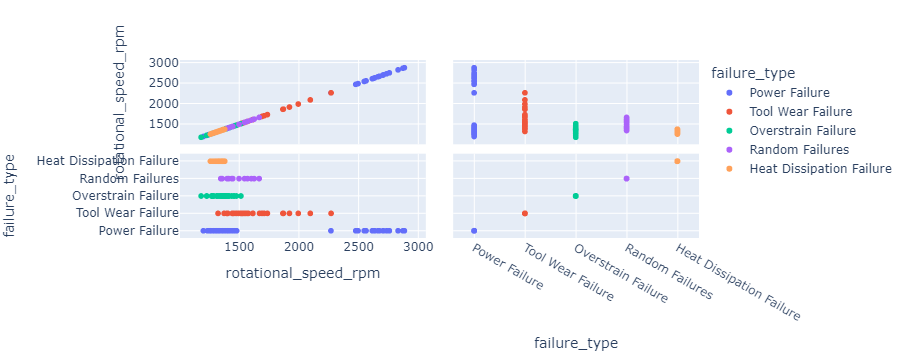

In [54]:
grafico = px.scatter_matrix(basescatter, dimensions=['rotational_speed_rpm', 'failure_type'], color = 'failure_type')
grafico

#### Toolwear

* As falhas do tipo 'Tool Wear Failure' e 'Overstrain Failure' ocorrem em faixas restritas de valores de 'tool_wear_min'

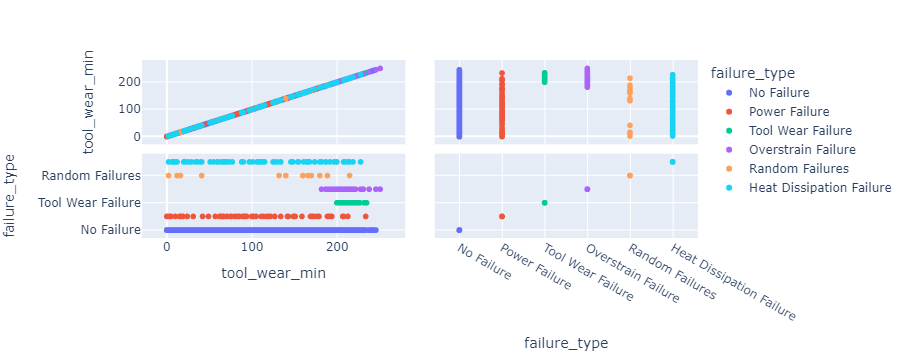

In [55]:
grafico = px.scatter_matrix(baseTreino, dimensions=['tool_wear_min', 'failure_type'], color = 'failure_type')
grafico

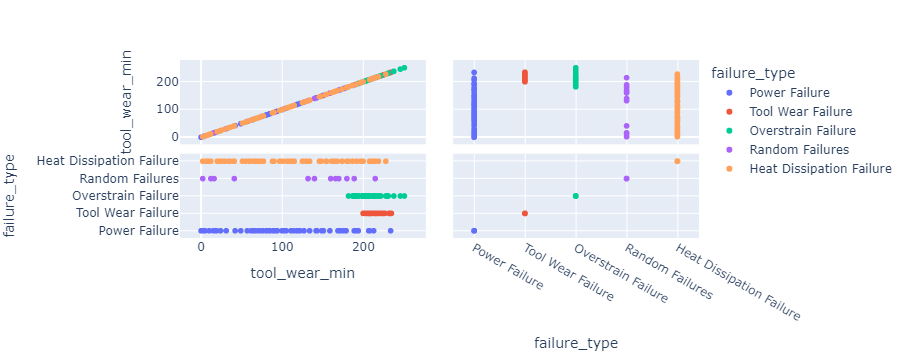

In [56]:
grafico = px.scatter_matrix(basescatter, dimensions=['tool_wear_min', 'failure_type'], color = 'failure_type')
grafico